In [1]:
from AMAT.planet import Planet
from AMAT.vehicle import Vehicle

In [2]:
# Create a planet object
planet=Planet("VENUS")
planet.h_skip = 150000.0

# Load an nominal atmospheric profile with height, temp, pressure, density data
planet.loadAtmosphereModel('../../../atmdata/Venus/venus-gram-avg.dat', 0 , 1 ,2, 3)


# Set up a vehicle object
vehicle1=Vehicle('SmallSat1', 37, 20, 0.0, 1.767, 0.0, 0.35, planet)
vehicle1.setInitialState(150.0,-6.22,23.16,10.8191,89.9982,-5.00,0.0,0.0)
vehicle1.setSolverParams(1E-6)
vehicle1.setDragModulationVehicleParams(20, 7.5)

Find the corridor bounds to select a target nominal EFPA for a nominal Mars atmosphere, with inertial correction.

In [86]:
underShootLimit, exitflag_us = vehicle1.findUnderShootLimitD2(2400.0, 1.0, -10.0,-4.0, 1E-10, 2000.0)
overShootLimit , exitflag_os = vehicle1.findOverShootLimitD2(2400.0, 1.0, -10.0,-4.0, 1E-10,  2000.0)

print("Target apoapis: 2000 km")
print("----------------")
print(underShootLimit, exitflag_us)
print(overShootLimit,  exitflag_os)
print("----------------")

Target apoapis: 2000 km
----------------
-5.530822996573988 1.0
-5.109830083616544 1.0
----------------


Propagate an entry tarjectory at mid-corridor

In [22]:
# Set planet.h_low to 10 km, if vehicle dips below this level
# trajctory is terminated.
planet.h_low=10.0E3

# Set target orbit = 2000 km x 2000 km, tolerance = 20 km
# target apo intentionally set to slightly higher value to account for bias in guidance
vehicle1.setTargetOrbitParams(200.0, 2000.0, 20.0)

# Set entry phase parameters
# v_switch_kms = 2.0, lowAlt_km = 20.0, 
# numPoints_lowAlt = 101, hdot_threshold = -200.0 m/s.
# These are somewhat arbitary based on experience.
vehicle1.setDragEntryPhaseParams(2.0, 20.0, 101, -200.0)

# Set beta_1 and beta_ratio
vehicle1.setDragModulationVehicleParams(20, 7.5)

# Set vehicle initial state
vehicle1.setInitialState(150.0,-6.22,23.16,10.8191,89.9982,-5.10,0.0,0.0)
# Propogate a single vehicle trajectory
vehicle1.propogateGuidedEntryD2(1.0,1.0,0.1,2400.0)

In [20]:
import matplotlib.pyplot as plt

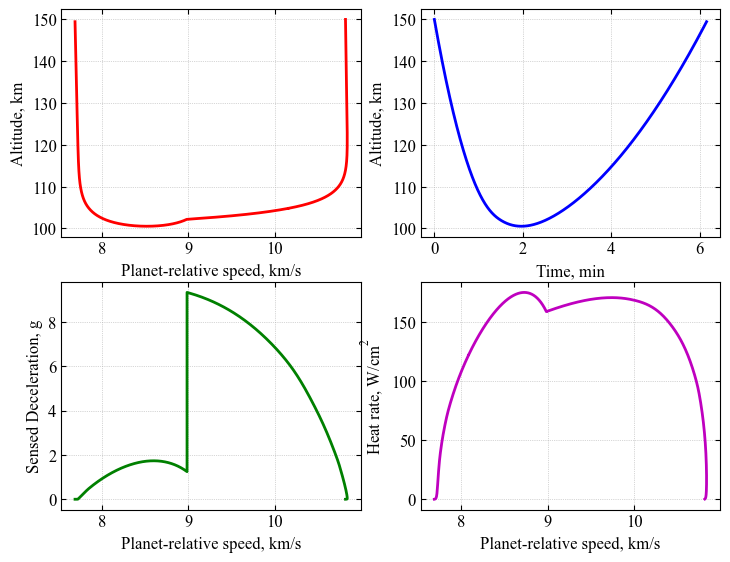

In [21]:
plt.figure(figsize=(8.5, 6.5))
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)


plt.subplot(2, 2, 1)
plt.plot(vehicle1.v_kms_full, vehicle1.h_km_full, 'r-', linewidth=2.0)
plt.xlabel('Planet-relative speed, km/s',fontsize=12)
plt.ylabel('Altitude, km',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 2)
plt.plot(vehicle1.t_min_full, vehicle1.h_km_full, 'b-', linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Altitude, km',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 3)
plt.plot(vehicle1.v_kms_full, vehicle1.acc_net_g_full, 'g-', linewidth=2.0)
plt.xlabel('Planet-relative speed, km/s',fontsize=12)
plt.ylabel('Sensed Deceleration, g',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.subplot(2, 2, 4)
plt.plot(vehicle1.v_kms_full, vehicle1.q_stag_total_full, 'm-', linewidth=2.0)
plt.xlabel('Planet-relative speed, km/s',fontsize=12)
plt.ylabel('Heat rate, '+r'$W/cm^2$',fontsize=12)
ax=plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
ax.tick_params(axis='x',labelsize=12)
ax.tick_params(axis='y',labelsize=12)
plt.grid(linestyle='dotted', linewidth=0.5)

plt.show()

In [18]:
vehicle1.terminal_apoapsis

2224.1112530262294

In [91]:
vehicle1.terminal_periapsis

101.53167786859349

In [92]:
vehicle1.periapsis_raise_DV

26.44779563549764